In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

/root/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


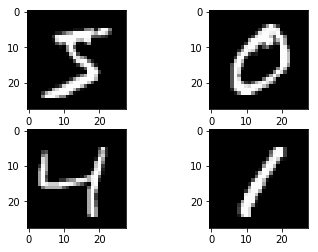

In [9]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [10]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [11]:
X_train1 = X_train[y_train==1]

In [12]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[1],1 ).astype('float32')
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[1],1).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [13]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [17]:
model = Sequential()
model.add(Conv2D(10, (3,3), input_shape=(28, 28,1), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
flatten_3 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               676100    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 677,210
Trainable params: 677,210
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 25s 415us/step - loss: 0.4870 - acc: 0.8652 - val_loss: 0.2419 - val_acc: 0.9300
Epoch 2/5
60000/60000 [==============================] - 25s 409us/step - loss: 0.2147 - acc: 0.9379 - val_loss: 0.1825 - val_acc: 0.9475
Epoch 3/5
60000/60000 [==============================] - 24s 408us/step - loss: 0.1562 - acc: 0.9550 - val_loss: 0.1355 - val_acc: 0.9588
Epoch 4/5
60000/60000 [==============================] - 25s 409us/step - loss: 0.1185 - acc: 0.9657 - val_loss: 0.1083 - val_acc: 0.9679
Epoch 5/5
60000/60000 [==============================] - 25s 411us/step - loss: 0.0881 - acc: 0.9750 - val_loss: 0.0852 - val_acc: 0.9759


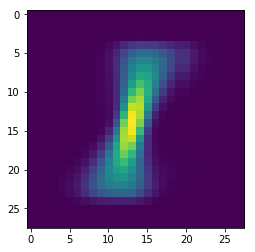

In [19]:
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
  pic2=X_train1[i,:,:]
  pic=pic+pic2
pic=(pic/X_train1.shape[0])
for i in range(pic.shape[0]):
  if i<20:
    pic[:,i]=pic[:,i+1]
plt.imshow(pic)

In [20]:
model.predict(pic.reshape(1,28,28,1))

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0277096e-27, 0.0000000e+00]], dtype=float32)

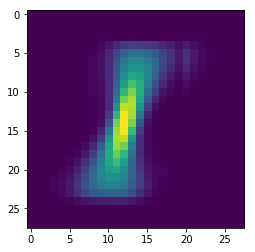

In [21]:
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
  pic2=X_train1[i,:,:]
  pic=pic+pic2
pic=(pic/X_train1.shape[0])
for i in range(pic.shape[0]):
  if i<20:
    pic[:,i]=pic[:,i+2]
plt.imshow(pic)

In [22]:
model.predict(pic.reshape(1,28,28,1))

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[1],1 ).astype('float32')
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[1],1).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [24]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1601000   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10010     
Total para

In [25]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 108s 2ms/step - loss: 0.4772 - acc: 0.8695 - val_loss: 0.1175 - val_acc: 0.9664
Epoch 2/5
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0996 - acc: 0.9703 - val_loss: 0.0674 - val_acc: 0.9796
Epoch 3/5
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0651 - acc: 0.9800 - val_loss: 0.0470 - val_acc: 0.9849
Epoch 4/5
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0494 - acc: 0.9851 - val_loss: 0.0433 - val_acc: 0.9856
Epoch 5/5
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0399 - acc: 0.9884 - val_loss: 0.0390 - val_acc: 0.9863


In [31]:
X_train1=X_train1/255

In [33]:
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
  pic2=X_train1[i,:,:]
  pic=pic+pic2
pic=(pic/X_train1.shape[0])
for i in range(pic.shape[0]):
  if i<20:
    pic[:,i]=pic[:,i+2]
model.predict(pic.reshape(1,28,28,1))


array([[4.1855540e-02, 8.9584994e-01, 6.2514492e-03, 2.2279122e-05,
        2.6410792e-03, 3.4395549e-03, 2.0000298e-02, 1.5013762e-03,
        2.8371729e-02, 6.6906665e-05]], dtype=float32)

In [34]:
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
  pic2=X_train1[i,:,:]
  pic=pic+pic2
pic=(pic/X_train1.shape[0])
for i in range(pic.shape[0]):
  if i<20:
    pic[:,i]=pic[:,i+3]
model.predict(pic.reshape(1,28,28,1))

array([[4.7118577e-01, 2.8054485e-01, 1.6965514e-02, 1.6241280e-05,
        1.4053478e-02, 1.8991435e-02, 1.2542696e-01, 5.0114524e-03,
        6.7670859e-02, 1.3335940e-04]], dtype=float32)

In [37]:
from keras.preprocessing.image import ImageDataGenerator
shift=0.2
datagen = ImageDataGenerator(width_shift_range=shift)
datagen.fit(X_train)
i=0
for X_batch,y_batch in datagen.flow(X_train,y_train,batch_size=100):
    i=i+1
    print(i)
    if(i>500):
        break
    X_train=np.append(X_train,X_batch,axis=0)
    y_train=np.append(y_train,y_batch,axis=0)
print(X_train.shape)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
